In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [6]:
absolute_path = "/Users/joaosousa/Desktop/Ironhack/5th_week/LAB/lab-eda-univariate/amz_uk_price_prediction_dataset.csv"

df = pd.read_csv(absolute_path)


In [5]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [27]:
#Frequency Tables:

#Generate a frequency table for the product category.

frequency_table = df["category"].value_counts()
proportion_table = df["category"].value_counts(normalize=True)*100 # gives values in percentage 

frequency_table, proportion_table 

(category
 Sports & Outdoors                         836265
 Beauty                                     19312
 Handmade Clothing, Shoes & Accessories     19229
 Bath & Body                                19092
 Birthday Gifts                             18978
                                            ...  
 Alexa Built-In Devices                       107
 Motorbike Chassis                            107
 Plugs                                        107
 Smart Home Security & Lighting               104
 Smart Speakers                                54
 Name: count, Length: 296, dtype: int64,
 category
 Sports & Outdoors                         34.221949
 Beauty                                     0.790293
 Handmade Clothing, Shoes & Accessories     0.786896
 Bath & Body                                0.781290
 Birthday Gifts                             0.776625
                                             ...    
 Alexa Built-In Devices                     0.004379
 Motorbike Chassis

In [26]:
#Which are the top 5 most listed product categories?

top_5_categories = proportion_table.head(5)
top_5_categories

category
Sports & Outdoors                         34.221949
Beauty                                     0.790293
Handmade Clothing, Shoes & Accessories     0.786896
Bath & Body                                0.781290
Birthday Gifts                             0.776625
Name: proportion, dtype: float64

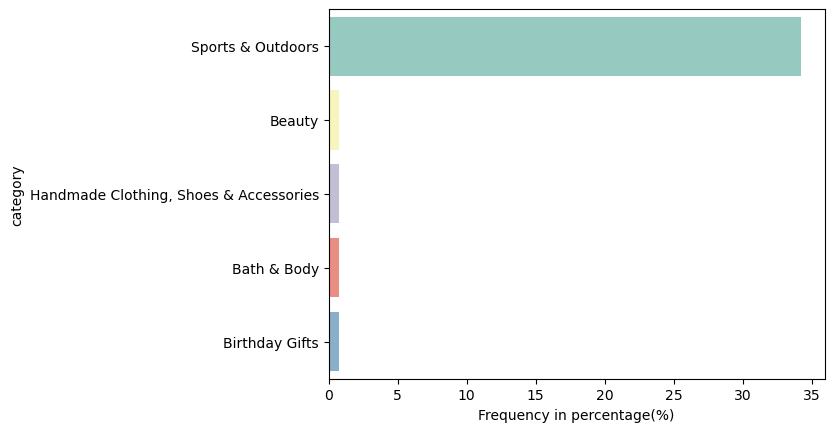

In [39]:
#Display the distribution of products across different categories using a bar chart. 
#If you face problems understanding the chart, do it for a subset of top categories.

sns.barplot(x=top_5_categories.values, y=top_5_categories.index, palette="Set3");

plt.xlabel('Frequency in percentage(%)', fontsize=10)

plt.show()



<Axes: ylabel='count'>

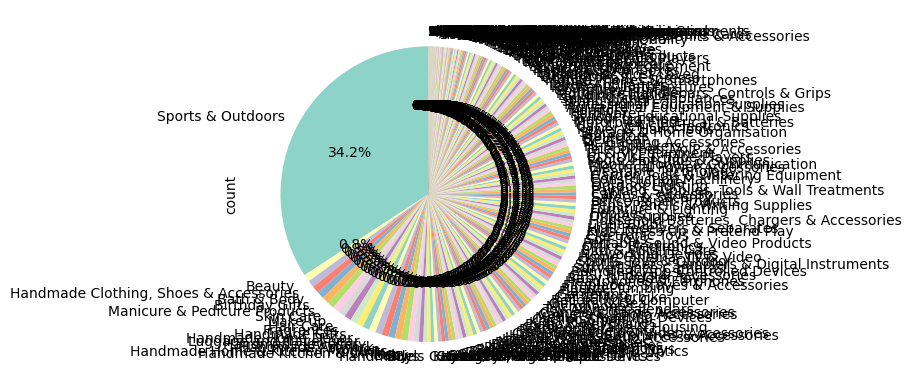

In [47]:
#For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?
df["category"].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))

#clearly sports & outdoors

In [48]:
#Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?



In [66]:
#Measures of Centrality:

#Calculate the mean, median, and mode for the price of products.


print(f"mean is {df['price'].mean()}")
print(f"median is {df['price'].median()}")
print(f"mode is {df['price'].mode()[0]}")


#What's the average price point of products listed? How does this compare with the most common price point (mode)?

''' The average is 89£ and the mode is 9.99£, what means majority of the products that are listed to sell cost 9.99, 
however exist others products which are way more expensive increasing the average of the price  ''' 

mean is 89.24380943923663
median is 19.09
mode is 9.99


' The average is 89£ and the mode is 9.99£, what means majority of the products that are listed to sell cost 9.99, \nhowever exist others products which are way more expensive increasing the average of the price  '

In [75]:
#Determine the variance, standard deviation, range, and interquartile range for product price.
print(f" SD is {df['price'].std()}")
print(f" Variance is {df['price'].var()}")
column_range = df['price'].max()- df['price'].min()
print("Column range is", column_range)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3-Q1
print("Interquartile Range (IQR):", IQR)


 SD is 345.60886175352226
 Variance is 119445.48532256528
Column range is 100000.0
Interquartile Range (IQR): 36.0


In [76]:
#How varied are the product prices? Are there any indicators of a significant spread in prices?
''' Not that much actually, if we look to value of the interquartile tell us that 50% of ours values are between a range price of 36£, with this method we eleminate for our analysis the outliers'''

' Not that much actually, if we look to value of the interquartile tell us that 50% of ours values are between a range price of 36£, with this method we eleminate for our analysis the outliers'

/opt/anaconda3/envs/new_base/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


' is really difficult with histogram due almost all the values are concentrated in one value '

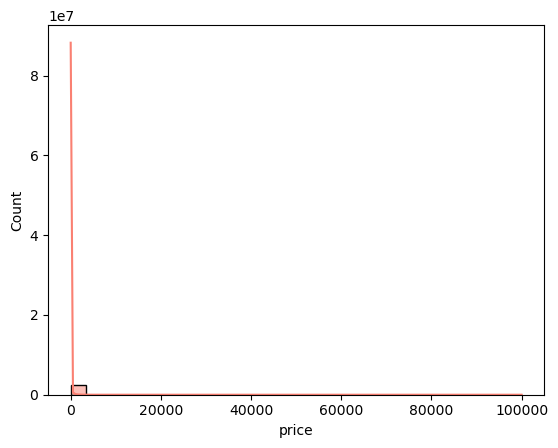

In [80]:
#Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..
sns.histplot(df['price'], kde=True, bins=30, color="salmon");

''' is really difficult with histogram due almost all the values are concentrated in one value '''


' Absolutely, you can 2 outliers of 100000 and roughly 800000 '

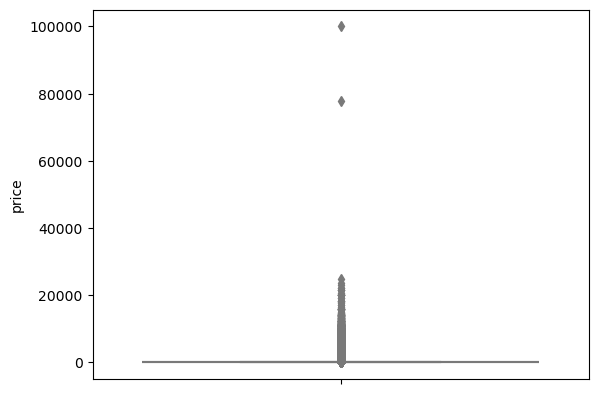

In [83]:
#Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.
sns.boxplot(y = df['price'], color="lightblue");


''' Absolutely, you can 2 outliers of 100000 and roughly 800000 '''

In [87]:
#Measures of Centrality:

#Calculate the mean, median, and mode for the rating of products.

print(f"mean is {df['stars'].mean()}")
print(f"median is {df['stars'].median()}")
print(f"mode is {df['stars'].mode()}")

df['stars'].describe()

#How do customers generally rate products? Is there a common trend?
''' 75% of the customeres rated with 4.4 stars ''' 

mean is 2.152836472966065
median is 0.0
mode is 0    0.0
Name: stars, dtype: float64


count    2.443651e+06
mean     2.152836e+00
std      2.194865e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      4.400000e+00
max      5.000000e+00
Name: stars, dtype: float64

In [91]:
#Measures of Dispersion:

#Determine the variance, standard deviation, and interquartile range for product rating.
print(f" SD is {df['stars'].std()}")
print(f" Variance is {df['stars'].var()}")
column_range = df['stars'].max()- df['stars'].min()
print("Column range is", column_range)
Q1_stars = df['stars'].quantile(0.25)
Q3_stars= df['stars'].quantile(0.75)
IQR_stars = Q3_stars-Q1_stars
print("Interquartile Range (IQR):", IQR_stars)


#Are the ratings consistent, or is there a wide variation in customer feedback?

''' wide variation from customer feedback, 4.8. However 50% given a 4.4 rank ''' 

 SD is 2.1948653785054697
 Variance is 4.81743402976196
Column range is 5.0
Interquartile Range (IQR): 4.4


' wide variation from customer feedback, 4.8. '

In [93]:
#Shape of the Distribution:

#Calculate the skewness and kurtosis for the rating column.

df['stars'].skew()
df['stars'].kurtosis()

#Are the ratings normally distributed, or do they lean towards higher or lower values?


''' They lean towards lower values '''

-1.9260061280432985

/opt/anaconda3/envs/new_base/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


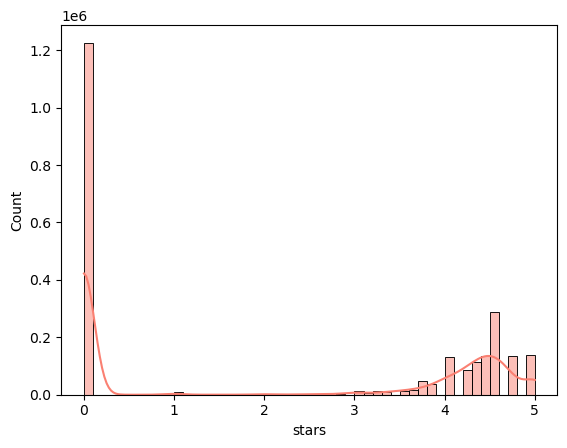

In [95]:
#Visualizations:

#Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

sns.histplot(df['stars'], kde=True, bins=50, color="salmon");

''' Yes, absolutely. 0 is the more comumn rank, probably due lack of review '''